# Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).
- Convert text to lowercase and remove punctuation using re.
- Tokenize the text into words and sentences.
- Split using split() and word_tokenize() and compare how Python split and NLTK’s word_tokenize() differ.
- Remove stopwords (using NLTK's stopwords list).
- Display word frequency distribution (excluding stopwords).

[nltk_data] Downloading package punkt to C:\Users\A/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\A/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Python split(): ['in', 'todays', 'digital', 'age', 'data', 'drives', 'every', 'major', 'decision', 'data', 'scientists', 'analyze', 'massive', 'amounts', 'of', 'data', 'to', 'uncover', 'insights', 'these', 'insights', 'help', 'train', 'machine', 'learning', 'models', 'that', 'power', 'realworld', 'applications', 'while', 'models', 'are', 'essential', 'the', 'underlying', 'algorithm', 'plays', 'a', 'critical', 'role', 'in', 'performance', 'occasionally', 'an', 'anomaly', 'or', 'outlier', 'may', 'appear', 'prompting', 'further', 'investigation', 'despite', 'challenges', 'the', 'field', 'of', 'artificial', 'intelligence', 'remains', 'one', 'of', 'the', 'most', 'exciting', 'frontiers', 'in', 'modern', 'technology']

NLTK word_tokenize(): ['in', 'todays', 'digital', 'age', 'data', 'drives', 'every', 'major', 'decision', 'data', 'scientists', 'analyze', 'massive', 'amounts', 'of', 'data', 'to', 'uncover', 'insights', 'these', 'insights', 'help', 'train', 'machine', 'learning', 'models', 'tha

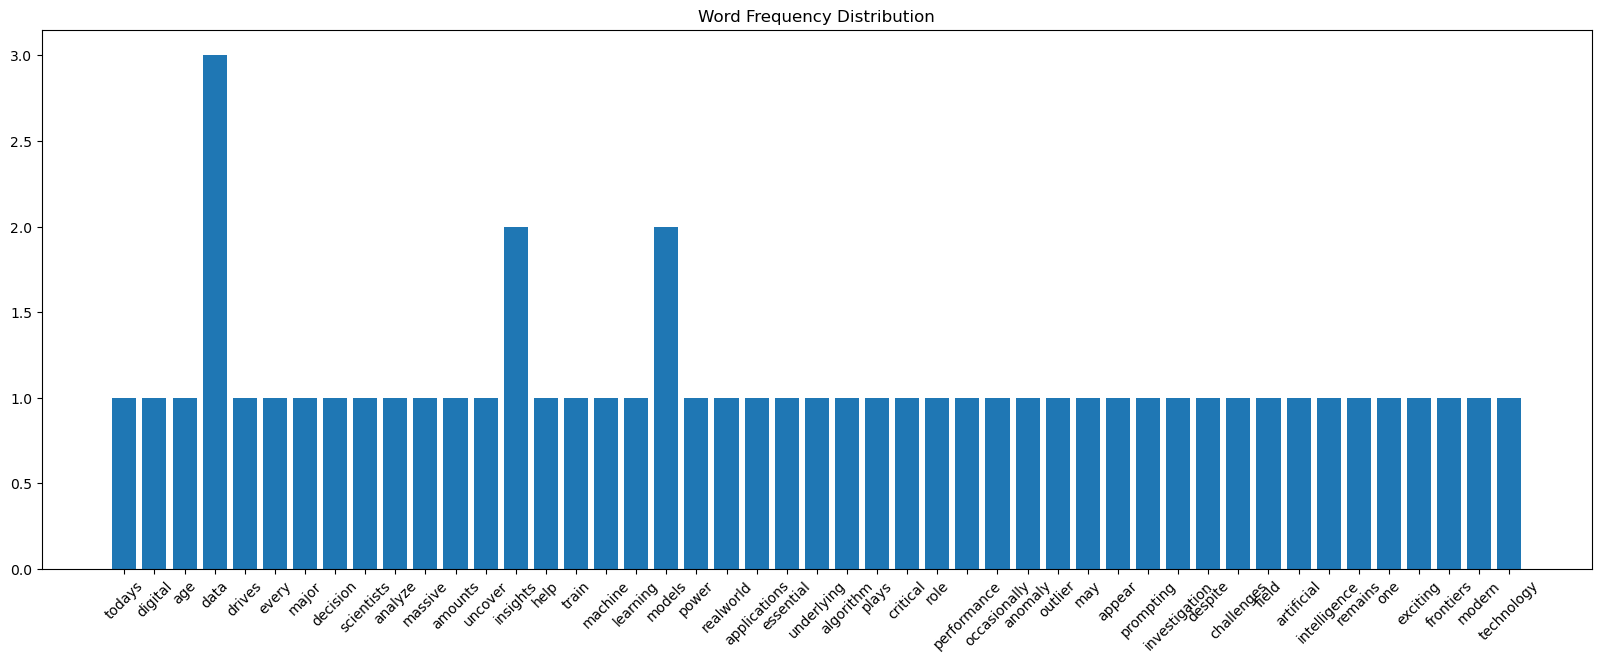

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

paragraph = """In today's digital age, data drives every major decision. Data scientists analyze massive amounts of data to uncover insights. These insights help train machine learning models that power real-world applications. While models are essential, the underlying algorithm plays a critical role in performance. Occasionally, an anomaly or outlier may appear, prompting further investigation. Despite challenges, the field of artificial intelligence remains one of the most exciting frontiers in modern technology."""

# 1. Lowercase & remove punctuation
clean_text = re.sub(r'[^\w\s]', '', paragraph.lower())

# 2. Tokenization
word_tokens = word_tokenize(clean_text)
sentence_tokens = sent_tokenize(paragraph)

# 3. Split vs word_tokenize
split_tokens = clean_text.split()
print("Python split():", split_tokens)
print()
print("NLTK word_tokenize():", word_tokens)
print()

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]

# 5. Frequency distribution
freq_dist = Counter(filtered_words)
print("Word Frequency (excluding stopwords):", freq_dist)

# Plot
plt.figure(figsize=(20, 7))
plt.bar(freq_dist.keys(), freq_dist.values())
plt.title('Word Frequency Distribution')
plt.xticks(rotation=45)
plt.show()


# Q2. Using the same paragraph from Q1:
- Extract all words with only alphabets using re.findall()
- Remove stop words using NLTK’s stopword list
- Perform stemming with PorterStemmer
- Perform lemmatization with WordNetLemmatizer
- Compare the stemmed and lemmatized outputs and explain when you’d prefer one over the other.

In [4]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# 1. Extract words with only alphabets
alpha_words = re.findall(r'\b[a-zA-Z]+\b', clean_text)

# 2. Remove stopwords again
filtered_alpha_words = [word for word in alpha_words if word not in stop_words]

# 3. Stemming
stemmer = PorterStemmer()
stemmed = [stemmer.stem(word) for word in filtered_alpha_words]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_alpha_words]

print("Stemmed:", stemmed)
print()
print("Lemmatized:", lemmatized)

[nltk_data] Downloading package wordnet to C:\Users\A/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\A/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Stemmed: ['today', 'digit', 'age', 'data', 'drive', 'everi', 'major', 'decis', 'data', 'scientist', 'analyz', 'massiv', 'amount', 'data', 'uncov', 'insight', 'insight', 'help', 'train', 'machin', 'learn', 'model', 'power', 'realworld', 'applic', 'model', 'essenti', 'underli', 'algorithm', 'play', 'critic', 'role', 'perform', 'occasion', 'anomali', 'outlier', 'may', 'appear', 'prompt', 'investig', 'despit', 'challeng', 'field', 'artifici', 'intellig', 'remain', 'one', 'excit', 'frontier', 'modern', 'technolog']

Lemmatized: ['today', 'digital', 'age', 'data', 'drive', 'every', 'major', 'decision', 'data', 'scientist', 'analyze', 'massive', 'amount', 'data', 'uncover', 'insight', 'insight', 'help', 'train', 'machine', 'learning', 'model', 'power', 'realworld', 'application', 'model', 'essential', 'underlying', 'algorithm', 'play', 'critical', 'role', 'performance', 'occasionally', 'anomaly', 'outlier', 'may', 'appear', 'prompting', 'investigation', 'despite', 'challenge', 'field', 'artif

- Stemming is fast but crude (e.g., 'running' → 'run').
- Lemmatization is accurate but requires POS tagging for best results.
- For search engines or large-scale NLP, use stemming.
- For grammar-sensitive applications, use lemmatization.

# Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
- Use CountVectorizer to generate the Bag of Words representation.
- Use TfidfVectorizer to compute TF-IDF scores.
- Print and interpret the top 3 keywords from each text using TF-IDF.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
texts = [
    "The phone is great, battery lasts long.",
    "Terrible service, I would not recommend this restaurant.",
    "Laptop performance is amazing and battery life is excellent."
]

# 1. Bag of Words
count_vect = CountVectorizer()
bow = count_vect.fit_transform(texts)
print("BoW Feature Names:", count_vect.get_feature_names_out())
print("BoW Matrix:\n", bow.toarray())
df_bow = pd.DataFrame(bow.toarray(), columns=count_vect.get_feature_names_out(), index=['Document1','Document2','Document3'])
df_bow

BoW Feature Names: ['amazing' 'and' 'battery' 'excellent' 'great' 'is' 'laptop' 'lasts'
 'life' 'long' 'not' 'performance' 'phone' 'recommend' 'restaurant'
 'service' 'terrible' 'the' 'this' 'would']
BoW Matrix:
 [[0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1]
 [1 1 1 1 0 2 1 0 1 0 0 1 0 0 0 0 0 0 0 0]]


,amazing,and,battery,excellent,great,is,laptop,lasts,life,long,not,performance,phone,recommend,restaurant,service,terrible,the,this,would
Document1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0
Document2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,1
Document3,1,1,1,1,0,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [8]:
# 2. TF-IDF
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(texts)
print("TF-IDF Matrix:\n", tfidf.toarray())
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names_out(), index=['Document1','Document2','Document3'])
df_tfidf

TF-IDF Matrix:
 [[0.         0.         0.30650422 0.         0.40301621 0.30650422
  0.         0.40301621 0.         0.40301621 0.         0.
  0.40301621 0.         0.         0.         0.         0.40301621
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.37796447 0.
  0.         0.37796447 0.37796447 0.37796447 0.37796447 0.
  0.37796447 0.37796447]
 [0.33535157 0.33535157 0.25504351 0.33535157 0.         0.51008702
  0.33535157 0.         0.33535157 0.         0.         0.33535157
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]


,amazing,and,battery,excellent,great,is,laptop,lasts,life,long,not,performance,phone,recommend,restaurant,service,terrible,the,this,would
Document1,0.000000,0.000000,0.306504,0.000000,0.403016,0.306504,0.000000,0.403016,0.000000,0.403016,0.000000,0.000000,0.403016,0.000000,0.000000,0.000000,0.000000,0.403016,0.000000,0.000000
Document2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.377964,0.377964,0.377964,0.377964,0.000000,0.377964,0.377964
Document3,0.335352,0.335352,0.255044,0.335352,0.000000,0.510087,0.335352,0.000000,0.335352,0.000000,0.000000,0.335352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# 3. Top 3 keywords from each
import numpy as np

feature_names = tfidf_vect.get_feature_names_out()
for i, row in enumerate(tfidf.toarray()):
    top3 = np.argsort(row)[-3:][::-1]
    print(f"\nTop 3 keywords for text {i+1}:")
    for idx in top3:
        print(f"{feature_names[idx]} ({row[idx]:.2f})")



Top 3 keywords for text 1:
long (0.40)
the (0.40)
great (0.40)

Top 3 keywords for text 2:
would (0.38)
terrible (0.38)
service (0.38)

Top 3 keywords for text 3:
is (0.51)
amazing (0.34)
life (0.34)


# Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).
- Preprocess and tokenize both texts.
- Calculate:
    - Jaccard Similarity using sets
    - Cosine Similarity using TfidfVectorizer + cosine_similarity()
    - Analyze which similarity metric gives better insights in your case.

In [11]:
text1 = """Artificial Intelligence is the simulation of human intelligence in machines."""
text2 = """Blockchain is a decentralized ledger used to store digital transactions."""

# 1. Preprocess
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return set(word_tokenize(text))

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

# 2a. Jaccard Similarity
jaccard_sim = len(tokens1 & tokens2) / len(tokens1 | tokens2)
print("Jaccard Similarity:", jaccard_sim)

# 2b. Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform([text1, text2])
cos_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
print("Cosine Similarity:", cos_sim)


Jaccard Similarity: 0.05555555555555555
Cosine Similarity: 0.05117102977172801


- Jaccard gives a basic overlap of unique tokens — better for small texts.
- Cosine captures context and frequency — better for longer, more meaningful texts.
- In this case, Cosine gives a finer-grained similarity.

# Q5. Write a short review for a product or service.
- Use TextBlob or VADER to find polarity & subjectivity for each review.
- Classify reviews into Positive / Negative / Neutral.
- Create a word cloud using the wordcloud library for all positive reviews.

Polarity: 0.7
Subjectivity: 0.4
Sentiment: Positive


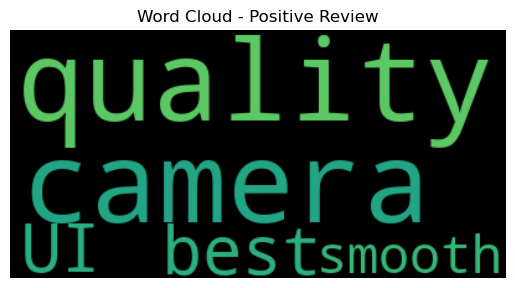

In [14]:
!pip install textblob
!pip install wordcloud
from textblob import TextBlob
from wordcloud import WordCloud

review = "The camera quality is best and the UI is smooth."

# 1. Polarity & Subjectivity
blob = TextBlob(review)
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

# 2. Classification
sentiment = 'Positive' if blob.sentiment.polarity > 0 else 'Negative' if blob.sentiment.polarity < 0 else 'Neutral'
print("Sentiment:", sentiment)

# 3. Word Cloud (Positive review)
if sentiment == 'Positive':
    wc = WordCloud().generate(review)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud - Positive Review")
    plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\A/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER Scores: {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249}
Sentiment: Positive


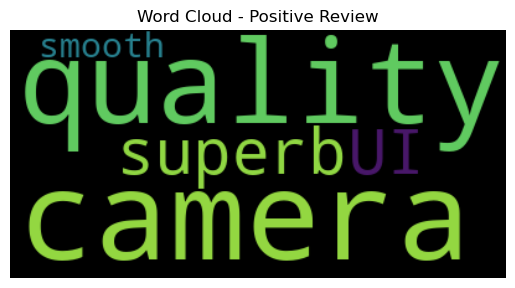

In [15]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = "The camera quality is superb and the UI is smooth."

analyzer = SentimentIntensityAnalyzer()
scores = analyzer.polarity_scores(review)

print("VADER Scores:", scores)

compound = scores['compound']
if compound >= 0.05:
    sentiment = 'Positive'
elif compound <= -0.05:
    sentiment = 'Negative'
else:
    sentiment = 'Neutral'

print("Sentiment:", sentiment)

if sentiment == 'Positive':
    wc = WordCloud().generate(review)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud - Positive Review")
    plt.show()

# Q6. Choose your own paragraph (~100 words) as training data.
- Tokenize text using Tokenizer() from keras.preprocessing.text
- Create input sequences and build a simple LSTM or Dense model
- Train the model and generate 2–3 new lines of text starting from any seed word you provide. 

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Input Text
text = """
The new smartphone delivers exceptional performance with its lightning-fast processor and vibrant display. 
The battery life lasts all day, and the camera captures stunning images even in low light. 
Its sleek design feels premium, and the user interface is smooth and intuitive. 
While the price is on the higher side, the overall experience justifies the cost. 
Apps load quickly, multitasking is seamless, and gaming performance is top-notch. 
The sound quality is crisp, and the fingerprint sensor is highly responsive. 
It's an ideal choice for tech enthusiasts seeking performance and style. 
Overall, this phone offers great value and satisfaction.
"""

# Tokenization
# Tokenizer splits text into words and assigns unique numbers based on word frequency.
# Most frequent words get lower numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print(tokenizer.word_index)
total_words = len(tokenizer.word_index) + 1
# +1 to include padding token (index 0) in vocabulary size


# Create input sequences
input_sequences = []
words = text.lower().split()
for i in range(1, len(words)):
    n_gram = words[:i+1]
    token_list = tokenizer.texts_to_sequences([' '.join(n_gram)])[0]
    # Convert current word sequence into a list of token (number) IDs
    input_sequences.append(token_list)

# Pad sequences
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split into X and y
input_sequences = np.array(input_sequences)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
# Convert y (word IDs) into one-hot encoded vectors for classification


# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=10))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=1)

# Text generation function
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += ' ' + output_word
    return seed_text

# Try generating
print("Generated Text with LSTM:\n")
print(generate_text("The smartphone delivers", next_words=10))


{'the': 1, 'and': 2, 'is': 3, 'performance': 4, 'its': 5, 'overall': 6, 'new': 7, 'smartphone': 8, 'delivers': 9, 'exceptional': 10, 'with': 11, 'lightning': 12, 'fast': 13, 'processor': 14, 'vibrant': 15, 'display': 16, 'battery': 17, 'life': 18, 'lasts': 19, 'all': 20, 'day': 21, 'camera': 22, 'captures': 23, 'stunning': 24, 'images': 25, 'even': 26, 'in': 27, 'low': 28, 'light': 29, 'sleek': 30, 'design': 31, 'feels': 32, 'premium': 33, 'user': 34, 'interface': 35, 'smooth': 36, 'intuitive': 37, 'while': 38, 'price': 39, 'on': 40, 'higher': 41, 'side': 42, 'experience': 43, 'justifies': 44, 'cost': 45, 'apps': 46, 'load': 47, 'quickly': 48, 'multitasking': 49, 'seamless': 50, 'gaming': 51, 'top': 52, 'notch': 53, 'sound': 54, 'quality': 55, 'crisp': 56, 'fingerprint': 57, 'sensor': 58, 'highly': 59, 'responsive': 60, "it's": 61, 'an': 62, 'ideal': 63, 'choice': 64, 'for': 65, 'tech': 66, 'enthusiasts': 67, 'seeking': 68, 'style': 69, 'this': 70, 'phone': 71, 'offers': 72, 'great': 7

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import random

text = """
The new smartphone delivers exceptional performance with its lightning-fast processor and vibrant display. 
The battery life lasts all day, and the camera captures stunning images even in low light. 
Its sleek design feels premium, and the user interface is smooth and intuitive. 
While the price is on the higher side, the overall experience justifies the cost. 
Apps load quickly, multitasking is seamless, and gaming performance is top-notch. 
The sound quality is crisp, and the fingerprint sensor is highly responsive. 
It's an ideal choice for tech enthusiasts seeking performance and style. 
Overall, this phone offers great value and satisfaction.
"""

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
words = text.lower().split()
for i in range(1, len(words)):
    n_gram = words[:i+1]
    token_list = tokenizer.texts_to_sequences([' '.join(n_gram)])[0]
    input_sequences.append(token_list)

# Pad sequences
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split into X and y
input_sequences = np.array(input_sequences)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Build a simple Dense model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len-1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(total_words, activation='softmax'))

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=1)

# Generate new lines of text
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += ' ' + output_word
    return seed_text

# Try generating
print("Generated Text with Dense model:\n")
print(generate_text("The smartphone delivers", next_words=10))


Epoch 1/200


C:\Users\A\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0156 - loss: 4.3359
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1774 - loss: 4.2945
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2148 - loss: 4.2653
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2491 - loss: 4.2353
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2748 - loss: 4.2095
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2956 - loss: 4.1628
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3590 - loss: 4.1129
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2925 - loss: 4.0495
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2428 - loss: 3.9686
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2095 - loss: 3.9025
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1877 - loss: 3.7793
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1961 - loss: 3.6847
E